# Analysis of Trans-Atlantic Slave Trade


In [2]:
# Setup

import pandas as pd
import numpy as np
import plotnine as p9
import warnings
warnings.filterwarnings('ignore')

In [3]:
tastdb = pd.read_csv('tastdb-2010.csv', encoding = 'latin-1')
tastdb = tastdb.replace(r'^\s*$', np.NaN, regex=True) # Replacing all empty strings with NaN
tastdb = tastdb.set_index('voyageid') 
tastdb

,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
voyageid,,,,,,,,,,,,,,,,,,,,,
1,1,Pastora de Lima,4,6,NaN,NaN,NaN,NaN,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Tibério,NaN,6,NaN,NaN,NaN,NaN,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Paquete Real,NaN,6,NaN,NaN,NaN,NaN,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Bom Caminho,NaN,6,NaN,NaN,NaN,NaN,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,Benigretta,NaN,6,NaN,NaN,NaN,NaN,25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900233,NaN,General Rêgo,4,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900234,NaN,Duas Clementinas,10,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
tastdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34490 entries, 1 to 900237
Data columns (total 97 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   evgreen       26116 non-null  object
 1   shipname      32908 non-null  object
 2   national      25186 non-null  object
 3   natinimp      32850 non-null  object
 4   placcons      8881 non-null   object
 5   yrcons        6182 non-null   object
 6   placreg       7218 non-null   object
 7   yrreg         4508 non-null   object
 8   rig           22000 non-null  object
 9   tonnage       17397 non-null  object
 10  tonmod        16365 non-null  object
 11  guns          6095 non-null   object
 12  ownera        20917 non-null  object
 13  ownerb        7574 non-null   object
 14  ownerc        4062 non-null   object
 15  ownerd        2663 non-null   object
 16  ownere        1851 non-null   object
 17  ownerf        1297 non-null   object
 18  ownerg        800 non-null    object
 19  own

In [5]:
tastdb_data_dict = ['voyageid: Voyage identification', #ID
                   'evgreen: Voyage in 1999 CD-Rom. 1 = yes. NaN = no', #1
                   'shipname: Name of  vessel', #2 IMPORTANT
                   'national: County in which ship registered', #3 IMPORTANT
                   'natinimp: Imputed country in which ship registered ', #4
                   'placcons: Place where the vessel was constructed', #5
                   'yrcons: Year of vessel construction', #6 IMPORTANT
                   'placreg: Place where vessel registration', #7
                   'yrreg: Year or vessel registration', #8
                   'rig: Rig of vessel', #9
                   'tonnage: Tonnage of vessel', #10
                   'tonmod: Tonnage standardized on British measured tons', #11
                   'guns: Guns mounted', #12
                   'ownera-ownerp: ith owner of the ship', #13
                   'ownera-ownerp: ith owner of the ship', #14
                   'ownera-ownerp: ith owner of the ship', #15
                   'ownera-ownerp: ith owner of the ship', #16
                   'ownera-ownerp: ith owner of the ship', #17
                   'ownera-ownerp: ith owner of the ship', #18
                   'ownera-ownerp: ith owner of the ship', #19
                   'ownera-ownerp: ith owner of the ship', #20
                   'ownera-ownerp: ith owner of the ship', #21
                   'ownera-ownerp: ith owner of the ship', #22
                   'ownera-ownerp: ith owner of the ship', #23
                   'ownera-ownerp: ith owner of the ship', #24
                   'ownera-ownerp: ith owner of the ship', #25
                   'ownera-ownerp: ith owner of the ship', #26
                   'ownera-ownerp: ith owner of the ship', #27
                   'ownera-ownerp: ith owner of the ship', #28
                   'fate: Particular outcome of voyage', #29 IMPORTANT
                   'fate2: Outcome of voyage for slaves', #30
                   'fate3: Outcome of voyage if vessel captured', #31
                   'fate4: Outcome of voyage for owner', #32
                   'resistance: Type of African Resistance. Nan = no resistance effort', #33 IMPORTANT
                   'ptdepimp: Imputed port where voyage began', #34
                   'plac1tra-plac3tra: ith place of slave purchase', #35
                   'plac1tra-plac3tra: ith place of slave purchase', #36
                   'plac1tra-plac3tra: ith place of slave purchase', #37
                   'mjbyptim: Imputed principal place of slave purchase', #38
                   'npafttra: Port of call before Atlantic crossing', #39
                   'sla1port: First place of slave landing', #40
                   'adpsale1: Second place of slave landing', #41
                   'adpsale2: Third place of slave landing', #42
                   'mjslptimp: Imputed principal port of slave disembarkation', #43
                   'portret: Place at which voyage ended', #44 IMPORTANT
                   'yearam: Year of arrival at port of disembarkation', #45
                   'date_dep: Date the voyage began', #46 IMPORTANT
                   'date_buy: Date that slave purchase began', #47
                   'date_leftAfr: Date that vessel left last slaving port', #48
                   'date_land1: Date that slaves landed at first place', #49 IMPORTANT
                   'date_depam: Date ship left on return voyage', #50
                   'date_end: Date when voyage completed', #51 IMPORTANT
                   'voy1imp: Voyage length from home port to disembarkation in days', #52 IMPORTANT
                   'voy2imp: Voyage length from leaving Africa to disembarkation in days', #53
                   'captaina-captainc: ith captains name', #54 IMPORTANT
                   'captaina-captainc: ith captains name', #55
                   'captaina-captainc: ith captains name', #56
                   'crew1: Crew at voyage outset', #57
                   'crew3: Crew at first landing of slaves', #58
                   'crewdied: Crew died during completed voyage', #59
                   'slintend: Slaves intended from first port of purchase', #60
                   'ncar13-ncar17: Slaves carried from 1st,2nd,3rd port of purchase', #61
                   'ncar13-ncar17: Slaves carried from 1st,2nd,3rd port of purchase', #62
                   'ncar13-ncar17: Slaves carried from 1st,2nd,3rd port of purchase', #63
                   'tslavesd: Total slaves at departure from last slaving port', #64 IMPORTANT
                   'slaximp: Imputed total slaves embarked', #65
                   'slaarriv: Total slaves arrived at first port of disembarkation', #66
                   'slas32-sla39: Slaves disembarked at 1st,2nd,3rd place', #67
                   'slas32-sla39: Slaves disembarked at 1st,2nd,3rd place', #68
                   'slas32-sla39: Slaves disembarked at 1st,2nd,3rd place', #69
                   'slamimp: Imputed total slaves disembarked', #70
                   'menrat7-childrat7: Precentage of demographic at departure or arrival', #71
                   'menrat7-childrat7: Precentage of demographic at departure or arrival', #72
                   'menrat7-childrat7: Precentage of demographic at departure or arrival', #73
                   'menrat7-childrat7: Precentage of demographic at departure or arrival', #74
                   'menrat7-childrat7: Precentage of demographic at departure or arrival', #75
                   'menrat7-childrat7: Precentage of demographic at departure or arrival', #76
                   'jamcaspr: Average price of slaves standardized on sterling cash price of prime slaves sold in Jamaica', #77
                   'vymrtimp: Imputed slave deaths during Middle Passage', #78
                   'vymrtrat: Slave mortality rate', #79
                   'sourcea-sourcer: ith source of information', #80
                   'sourcea-sourcer: ith source of information', #81
                   'sourcea-sourcer: ith source of information', #82
                   'sourcea-sourcer: ith source of information', #83
                   'sourcea-sourcer: ith source of information', #84
                   'sourcea-sourcer: ith source of information', #85
                   'sourcea-sourcer: ith source of information', #86
                   'sourcea-sourcer: ith source of information', #87
                   'sourcea-sourcer: ith source of information', #88
                   'sourcea-sourcer: ith source of information', #89
                   'sourcea-sourcer: ith source of information', #90
                   'sourcea-sourcer: ith source of information', #91
                   'sourcea-sourcer: ith source of information', #92
                   'sourcea-sourcer: ith source of information', #93
                   'sourcea-sourcer: ith source of information', #94
                   'sourcea-sourcer: ith source of information', #95
                   'sourcea-sourcer: ith source of information'] #96

In [6]:
print('%s, %f' %('Percentage of NaN values:',tastdb['tslavesd'].isna().sum()/len(tastdb['tslavesd'])))

Percentage of NaN values:, 0.763410


However, since such a large proportion of the tslavesd variable is NaN, I will instead use the 'slaximp' variable. Which is the total number of slaves that were estimated to have embarked on the vessel.

In [7]:
print('%s, %f' %('Percentage of NaN values:',tastdb['slaximp'].isna().sum()/len(tastdb['slaximp'])))

Percentage of NaN values:, 0.044999


In [8]:
tastdb['slaximp'] = pd.to_numeric(tastdb['slaximp']) # Converting the column to a float

na_sum = tastdb['slaximp'].isna().sum() #Total number of NaN values in this column
slaximp_mean = np.nanmean(tastdb['slaximp']) # Mean of all the non-NaN  values

# Sum of the 'slaximp' column, plus the estimate for all NaN values, times the number of NaN values
estimated_captives = tastdb['slaximp'].sum() + (na_sum * slaximp_mean)
print('%s, %i' %('Rough estimation for the number of total captives taken from Africa:', estimated_captives.round()))

Rough estimation for the number of total captives taken from Africa:, 10438719


I think that the 'jamcaspr' variable would be significant. It is the standardized average price of enslaved people. I would expect that as the price of enslaved people increased, so too would the number of people taken from Africa. However there are only 13 non-NaN values for 'jamcaspr', so I do not think that it is justifiable to use this variable.

In [9]:
print('%s, %i' %('Number of non-NaN values for jamcaspr variable:', len(tastdb['jamcaspr']) - tastdb['jamcaspr'].isna().sum()))

Number of non-NaN values for jamcaspr variable:, 13


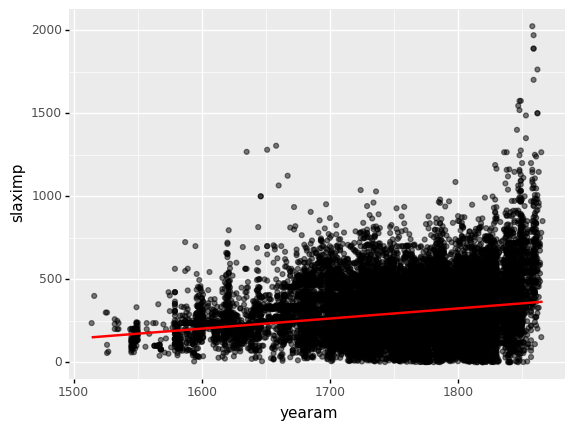

<ggplot: (8735789668539)>

In [33]:
#century = [1500, 1600, 1700, 1800, 1900]

slax_time = p9.ggplot(tastdb) + p9.aes(x = 'yearam', y = 'slaximp') \
+ p9.geom_point(alpha = .5) \
+ p9.stat_smooth(mapping=p9.aes(x = 'yearam', y = 'slaximp'), method='lm', se = False, inherit_aes=False, color='red')
slax_time

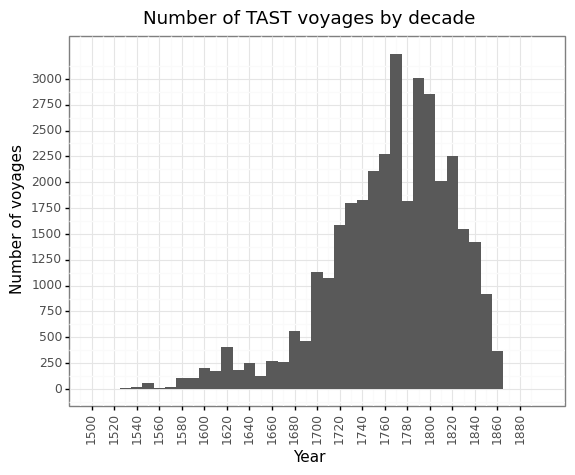

<ggplot: (8735796646464)>

In [34]:
slax_time2 = slax_time = p9.ggplot(tastdb) \
+ p9.aes(x = 'yearam ') + p9.geom_histogram(binwidth = 10) \
+ p9.theme_bw() \
+ p9.theme(axis_text_x = p9.element_text(angle=90)) \
+ p9.labs(title = 'Number of TAST voyages by decade',
      x = 'Year',
      y = 'Number of voyages') \
+ p9.scale_x_continuous(breaks=np.arange(1500, 1900, 20), limits=[1500, 1900]) \
+ p9.scale_y_continuous(breaks=np.arange(0, 3250, 250), limits=[0, 3250])

slax_time2

In [12]:
tastdb['national'].value_counts()

7     11009
4      5034
10     4069
9      1568
8      1237
1      1180
5       754
11      246
12       59
13       10
2         8
19        6
18        3
14        1
16        1
24        1
Name: national, dtype: int64

The values 7, 4, 10, 9, 8, 1, and 5 appear more than 300 times. Looking at the provided data dictionary, these values are associated with Great Britain, Portugal, France, U.S.A, Netherlands, Spain, and Brazil, respectively.

### b)

In [13]:
tastdb['national'] = pd.to_numeric(tastdb['national']) # Converting the column to an int
nations_sig = [7, 4, 10, 9, 8, 1, 5]

tastdb_sig = tastdb.loc[tastdb['national'].isin(nations_sig)]
tastdb_sig

,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
voyageid,,,,,,,,,,,,,,,,,,,,,
1,1,Pastora de Lima,4.0,6,NaN,NaN,NaN,NaN,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1,Sociedade,4.0,6,NaN,NaN,NaN,NaN,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,1,Patrocínio,4.0,6,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,1,NaN,10.0,10,NaN,NaN,NaN,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,1,NaN,10.0,10,NaN,NaN,NaN,NaN,4,300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900231,NaN,NS do Rosario,4.0,NaN,NaN,NaN,NaN,NaN,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900232,NaN,Tourville,10.0,NaN,NaN,NaN,NaN,NaN,20,210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900233,NaN,General Rêgo,4.0,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Nation ID in order: 1 4 5 7 8 9 10
nationality = ['Spain', 'Portugal', 'Brazil', 'Great Britain', 'Netherlands', 'U.S.A.', 'France']

In [15]:
# This code renames all of the natinal column to its specificed value in the code book
tastdb_sig['national'] = tastdb_sig['national'].astype('category')
tastdb_sig['national'] = tastdb_sig['national'].cat.rename_categories(nationality)

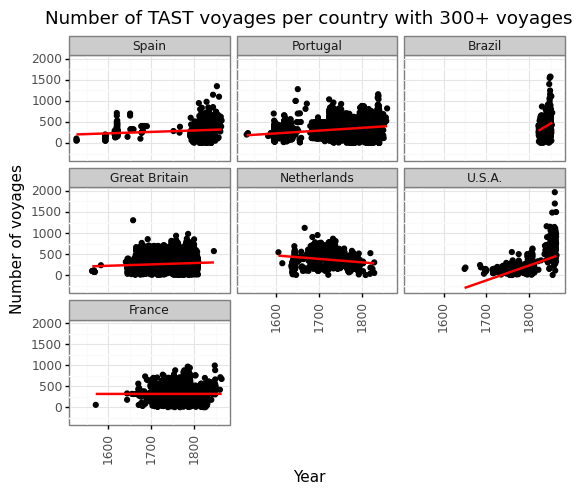

<ggplot: (8735800109044)>

In [16]:
slax_year_sig = p9.ggplot(tastdb_sig) \
+ p9.aes(x = 'yearam', y = 'slaximp') \
+ p9.geom_point() \
+ p9.facet_wrap('~national') \
+ p9.stat_smooth(mapping=p9.aes(x = 'yearam', y = 'slaximp'), method = 'lm', se = False, inherit_aes = False, color = 'red') \
+ p9.labs(title = 'Number of TAST voyages per country with 300+ voyages',
      x = 'Year',
      y = 'Number of voyages') \
+ p9.theme_bw() \
+ p9.theme(axis_text_x = p9.element_text(angle=90)) 

slax_year_sig

In [17]:
tastdb.loc[(tastdb['yrcons'] == '1781') & (tastdb['shipname'] == 'Brooks')][['shipname', 'yrcons', 'tonnage', 'rig', 'ownera', 'Date_dep']]

,shipname,yrcons,tonnage,rig,ownera,Date_dep
voyageid,,,,,,
80663,Brooks,1781,297,4,"Brooks, Joseph (Jr)",10/4/1781
80664,Brooks,1781,297,4,"Noble, Clement",6/3/1783
80665,Brooks,1781,297,4,"Noble, Clement",2/2/1785
80667,Brooks,1781,319,4,"Harper, William",7/29/1791
80668,Brooks,1781,319,4,"Harper, William",6/8/1792
80669,Brooks,1781,319,4,"Harper, William",7/8/1796
80670,Brooks,1781,319,4,"Harper, William",8/24/1797
80671,Brooks,1781,319,4,"Harper, William",2/8/1799
80672,Brooks,1781,353,4,"Neilson, William",11/18/1800


These 10 voyages match the Wikipedia description of the Brooks ship. Mainly the Ship name 'Brooks', the year launched '1781', and the tonnage, of either 297, 300, 319, 352, or 353.

According to the wikipedia article, this ship had 11 seperate voyages, however only 10 are listed in this database. The 4th voyage from 1786-1788 appears to be missing. The other 10 voyages match up with the dates of those listed in the Wikipedia article.

### b)

In [18]:
tastdb_sig['revolt'] = [not elem for elem in tastdb_sig['resistance'].isna()]
tastdb_sig['revolt']

voyageid
1         False
16        False
95        False
114       False
115       False
          ...  
900231    False
900232    False
900233    False
900234    False
900236    False
Name: revolt, Length: 24851, dtype: bool

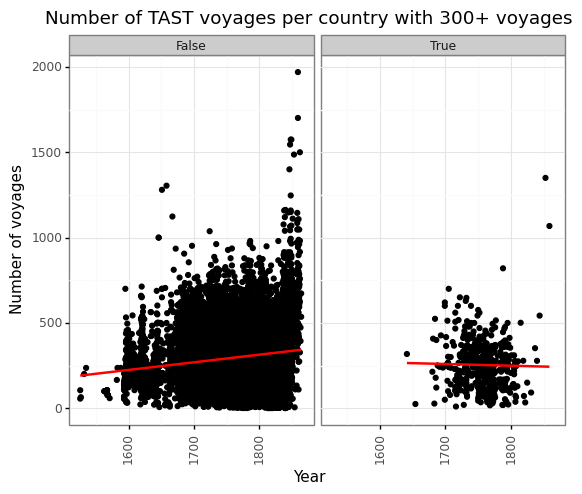

<ggplot: (8735800104418)>

In [19]:
revolt = p9.ggplot(tastdb_sig) \
+ p9.aes(x = 'yearam', y = 'slaximp') \
+ p9.geom_point() \
+ p9.facet_wrap('~revolt') \
+ p9.stat_smooth(mapping=p9.aes(x = 'yearam', y = 'slaximp'), method = 'lm', se = False, inherit_aes = False, color = 'red') \
+ p9.labs(title = 'Number of TAST voyages per country with 300+ voyages',
      x = 'Year',
      y = 'Number of voyages') \
+ p9.theme_bw() \
+ p9.theme(axis_text_x = p9.element_text(angle=90)) 

revolt

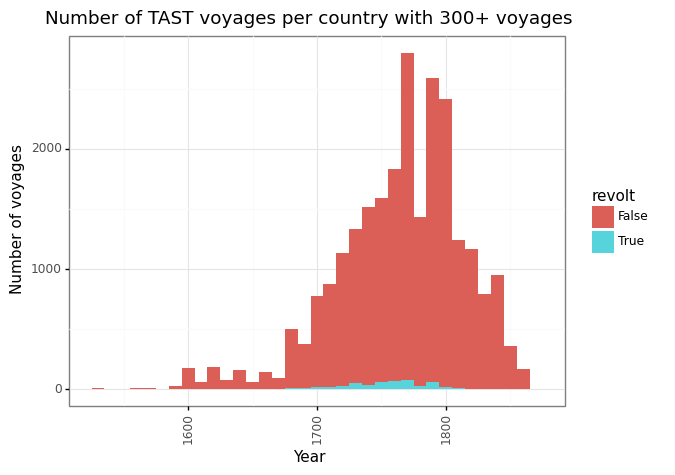

<ggplot: (8735790358414)>

In [20]:
# Alternate

revolt = p9.ggplot(tastdb_sig) \
+ p9.aes(x = 'yearam', fill = 'revolt') \
+ p9.geom_histogram(binwidth = 10) \
+ p9.labs(title = 'Number of TAST voyages per country with 300+ voyages',
      x = 'Year',
      y = 'Number of voyages') \
+ p9.theme_bw() \
+ p9.theme(axis_text_x = p9.element_text(angle=90)) 

revolt

Notes to self: 

Slave revolt in 1839.
Left port on June 28 1839

None with correct captain name & resistence
None with correct arrival date & resistence

In [21]:
#tastdb.loc[tastdb['resistance'] == '1']
#(tastdb['shipname'] == 'Amistad') & 
# & (tastdb['Date_end'] == '8/21/1839')
# & (tastdb['captaina'].str.contains('F'))
    
tastdb.loc[(tastdb['resistance'] == '1') & (tastdb['Date_leftAfr'] == '6/28/1839')][['shipname', 'yrcons', 'tonnage', 'rig', 'captaina', 'Date_dep']]

,shipname,yrcons,tonnage,rig,captaina,Date_dep
voyageid,,,,,,


In [22]:
departure_loc = ['Europe', 'Mainland North America', 'Caribbean', 'Spanish American Mainland', 'Brazil', 'Africa', 'Other', 'nan']

tastdb_sig['departure'] = tastdb_sig['ptdepimp'].dropna().astype(str).str[0]

# This code renames all of the departure column to its specificed value in the code book
tastdb_sig['departure'] = tastdb_sig['departure'].astype('category')
tastdb_sig['departure'] = tastdb_sig['departure'].cat.rename_categories(departure_loc)
tastdb_sig['departure']

voyageid
1         Brazil
16        Brazil
95        Brazil
114          NaN
115          NaN
           ...  
900231    Brazil
900232    Brazil
900233    Brazil
900234    Brazil
900236    Brazil
Name: departure, Length: 24851, dtype: category
Categories (8, object): ['Europe', 'Mainland North America', 'Caribbean', 'Spanish American Mainland', 'Brazil', 'Africa', 'Other', 'nan']

In [23]:
arrival_loc = ['Europe', 'Mainland North America', 'Caribbean', 'Spanish American Mainland', 'Brazil', 'Africa', 'Other']

tastdb_sig['arrival'] = tastdb_sig['sla1port'].dropna().dropna().astype(str).str[0]

tastdb_sig['arrival'] = tastdb_sig['arrival'].astype('category')
tastdb_sig['arrival'] = tastdb_sig['arrival'].cat.rename_categories(arrival_loc)
tastdb_sig['arrival']

voyageid
1            Brazil
16           Brazil
95           Brazil
114       Caribbean
115       Caribbean
            ...    
900231          NaN
900232          NaN
900233          NaN
900234          NaN
900236          NaN
Name: arrival, Length: 24851, dtype: category
Categories (7, object): ['Europe', 'Mainland North America', 'Caribbean', 'Spanish American Mainland', 'Brazil', 'Africa', 'Other']

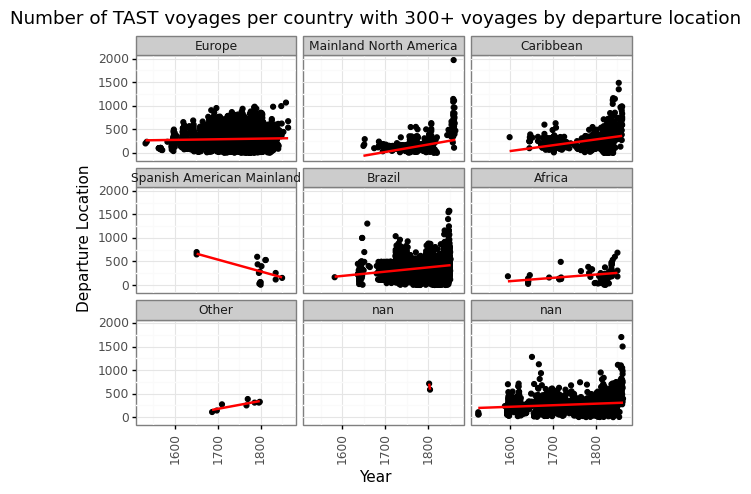

<ggplot: (8735790306497)>

In [24]:
slax_departure = p9.ggplot(tastdb_sig) \
+ p9.aes(x = 'yearam', y = 'slaximp') \
+ p9.facet_wrap('departure') \
+ p9.geom_point() \
+ p9.stat_smooth(mapping=p9.aes(x = 'yearam', y = 'slaximp'), method = 'lm', se = False, inherit_aes = False, color = 'red') \
+ p9.labs(title = 'Number of TAST voyages per country with 300+ voyages by departure location',
      x = 'Year',
      y = 'Departure Location') \
+ p9.theme_bw() \
+ p9.theme(axis_text_x = p9.element_text(angle=90)) 

slax_departure

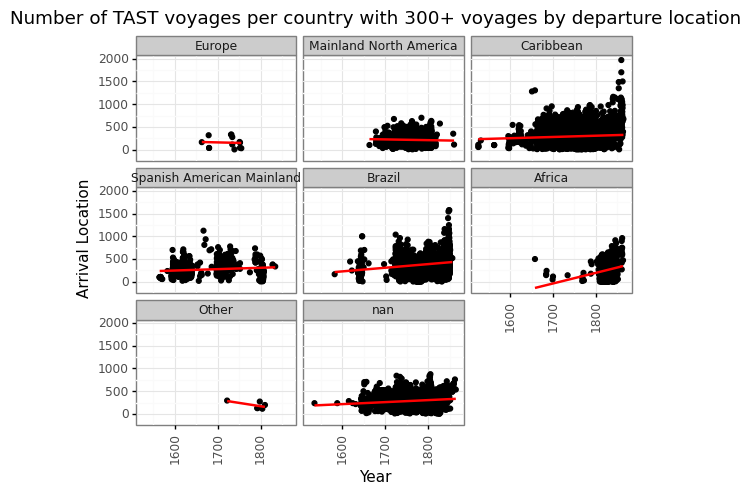

<ggplot: (8735799226787)>

In [25]:
slax_arrival = p9.ggplot(tastdb_sig) \
+ p9.aes(x = 'yearam', y = 'slaximp') \
+ p9.facet_wrap('arrival') \
+ p9.geom_point() \
+ p9.stat_smooth(mapping=p9.aes(x = 'yearam', y = 'slaximp'), method = 'lm', se = False, inherit_aes = False, color = 'red') \
+ p9.labs(title = 'Number of TAST voyages per country with 300+ voyages by departure location',
      x = 'Year',
      y = 'Arrival Location') \
+ p9.theme_bw() \
+ p9.theme(axis_text_x = p9.element_text(angle=90)) 

slax_arrival

Trends:

In [26]:
tastdb_sig['menrat7'] = tastdb_sig['menrat7'].astype('float')

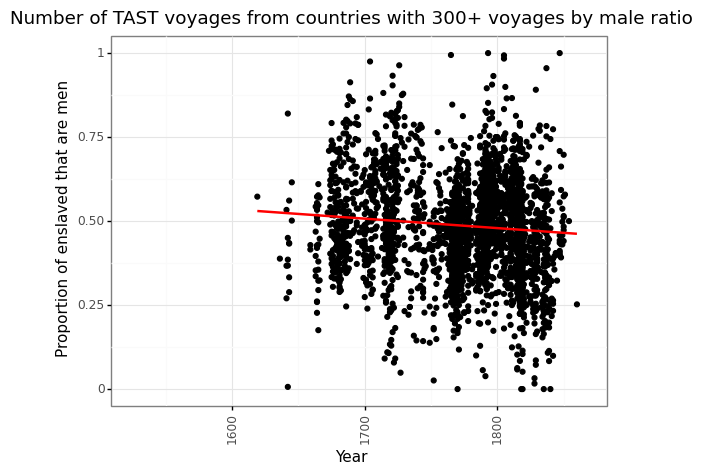

<ggplot: (8735789665527)>

In [27]:
slax_men = p9.ggplot(tastdb_sig) \
+ p9.aes(x = 'yearam', y = 'menrat7') \
+ p9.geom_point() \
+ p9.stat_smooth(mapping=p9.aes(x = 'yearam', y = 'menrat7'), method = 'lm', se = False, inherit_aes = False, color = 'red') \
+ p9.labs(title = 'Number of TAST voyages from countries with 300+ voyages by male ratio',
      x = 'Year',
      y = 'Proportion of enslaved that are men') \
+ p9.theme_bw() \
+ p9.theme(axis_text_x = p9.element_text(angle=90))

slax_men